# Research HW1 by Mukhammadrizo Maribjonov

### Background info

When you're driving with constant speed, even when turning, your tangential acceleration remains constant because your speed isn't changing. However, your normal acceleration increases while turning. Here's why:

Tangential Acceleration: This component of acceleration is parallel to the velocity vector. Since you're maintaining a constant speed, there's no change in the magnitude of your velocity vector along the direction of motion. Hence, tangential acceleration remains constant.

Normal Acceleration: This component of acceleration is perpendicular to the velocity vector, pointing towards the center of curvature of your path. When you're turning, your direction of motion is changing continuously, even if your speed remains constant. This change in direction requires a force towards the center of curvature, resulting in an increase in normal acceleration. The tighter the turn, the greater the change in direction and thus the greater the normal acceleration required.

In summary, while driving with constant speed, the acceleration that increases when turning is the normal acceleration. This increase is necessary to continuously change the direction of your velocity vector as you navigate the curve.

## Task

We have a mobile vehicle, which should survive after the track. We have

some predefined trajectory, which is given in y(x) format — our goal to pass this
trajectory as fast as possible. But at the end of the course, there is a drop-off. It
means that we should stop our machine at the end of the trajectory. We have to
establish some constraints, such as max tangent acceleration (max power on the
motor) and normal (road adhesion). Despite it, the best way is to represent our
robot as a particle. How should we move (speed and acceleration) for solving
such a task?


## Given

$a_{t_{max}} = 2\small{m/s^2}\\
a_{n_{max}} = 3\small{m/s^2}\\
v_{max} = 3\small{m/s}\\
y(x) = Axln(\frac{x}{B}),\\
\text{where } A = 3,\ B = 5, x \text{ exists on } [0\dots4]
$

## To find

$Y(x),\ Y(t),\ v(t),\ a_t(t),\ a_n(t),\ t$

## Solution

To minimise total travel time either $a_t$, $a_n$, or $v$ must equal to it's maximum.
Let's find their relations for each point on the path.

**Tangential Component**: This component is responsible for changes in speed. It accounts for the tangential acceleration.

**Normal Component**: This component is responsible for changes in direction. It accounts for the normal acceleration.

In fact at any point on the path we are only limited by $a_n$ and $v$ notice that $a_n ∼ v^2$, while $a_{\tau}$ shows how fast we can change $v$.

$a_n = \frac{v^2}{r}$, where $r(x) = \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|$ is a radius of curvature at point $x$.

From this we can derive 2 constraints for $v$:
$
\begin{cases}
a_n \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
$
$$
\begin{cases}
v^2 / r \le 3 \small{m/s^2};\\
v \le 3 \small{m/s};
\end{cases}
\\
\begin{cases}
v \le \sqrt{ a_{t_{max}} * \left| \frac{\left(1+y(x)^{\prime\ 2}\right)^\frac{2}{3}}{y(x)^{\prime\prime}} \right|};\\
v \le v_{max};
\end{cases}
$$

* $y(x) = 3xln(\frac{x}{5})$
* $\dot y(x) = 3ln(x) - 3ln(5) + 3$
* $\ddot y(x) = \frac{3}{x}$

### Let's Plot this values

#### Imports

In [78]:
%pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import animation
from scipy.integrate import quad
import pandas as pd 

Note: you may need to restart the kernel to use updated packages.


#### Plotting

In [79]:
ATMAX = 2
ANMAX = 3
VMAX = 3
XMIN = 0
XMAX = 4
dx = 0.0001

In [80]:
x = np.linspace(XMIN, XMAX, 1000)
y = lambda x: 3*x*np.log(x/5)
dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
ddy = lambda x: 3/x

# natural form
sigma = np.array([quad(lambda x: np.sqrt(1 + (dy(x)) ** 2), XMIN, x)[0] for x in x])
dsigma = np.gradient(sigma, x)
ddsigma = np.gradient(dsigma, x)

curvature = np.abs(ddy(x)) / ((1 + dy(x) ** 2) ** (3 / 2))

/tmp/ipykernel_116350/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
/tmp/ipykernel_116350/1548475892.py:7: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  sigma = np.array([quad(lambda x: np.sqrt(1 + (dy(x)) ** 2), XMIN, x)[0] for x in x])
/tmp/ipykernel_116350/1548475892.py:4: RuntimeWarning: divide by zero encountered in divide
  ddy = lambda x: 3/x
/tmp/ipykernel_116350/1548475892.py:11: RuntimeWarning: invalid value encountered in divide
  curvature = np.abs(ddy(x)) / ((1 + dy(x) ** 2) ** (3 / 2))


/tmp/ipykernel_116350/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_116350/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


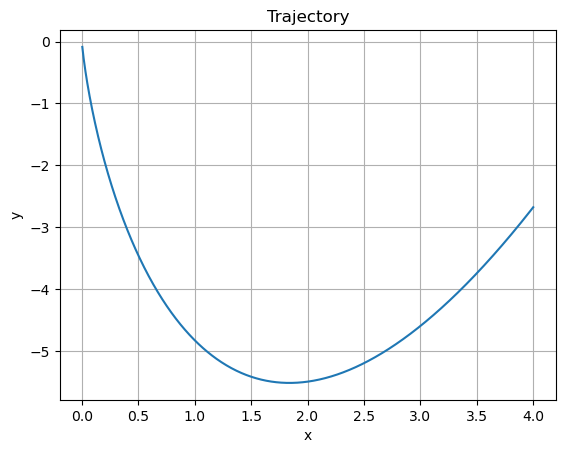

In [81]:
# draw trajectory on a plane

plt.grid()

plt.plot(x, y(x))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectory")
plt.savefig("trajectory.png")


Natural form $\sigma(x) = \int_{0}^{4} \sqrt{1 + \dot y(x)^2},dx$

9.80316612025513

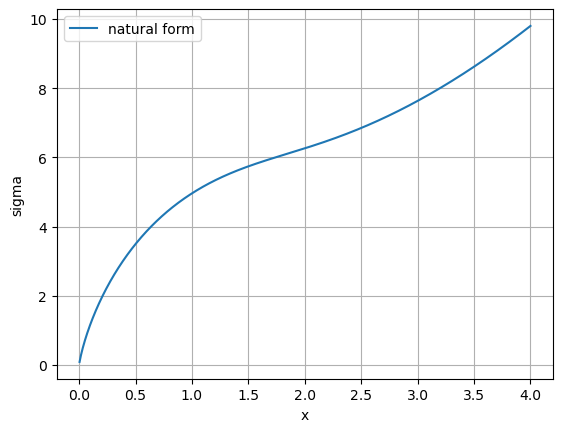

In [82]:
# show sigma by x

plt.grid()
plt.plot(x, sigma, label="natural form")
plt.xlabel("x")
plt.ylabel("sigma")

plt.legend()

sigma[-1]


$k(x) = \frac{\ddot y}{(\sqrt(1 + (\dot y)^2))^3}$

Text(0.5, 1.0, 'Curvature')

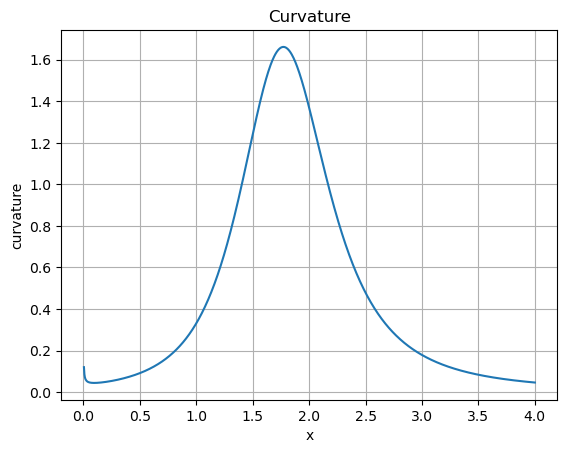

In [83]:
# let's find what is curvature at the each x

plt.grid()
plt.plot(x, curvature)
plt.xlabel("x")
plt.ylabel("curvature")
plt.title("Curvature")

Imagine we move with constant speed all the time, $v_{max} = 3$. How $a_n$ would look like in that case depending on cuvature $k(x)$?

$a_n(x) = k(x) \cdot v_{max}^2$, where $v_{max} = 3$

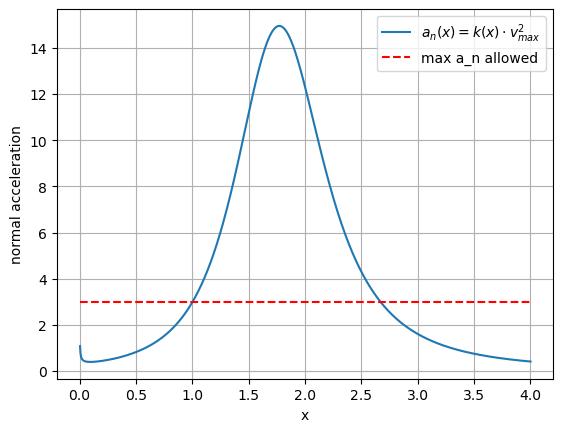

In [84]:
plt.grid()
plt.plot(x, curvature * VMAX**2, label='$a_n(x) = k(x) \cdot v_{max}^2$')
plt.hlines(
    ANMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max a_n allowed",
)
plt.xlabel("x")
plt.ylabel("normal acceleration")
plt.legend()

plt.savefig("normal_acceleration_lim.png")


As we see that $a_n$ exeeds the allowed $3$ at turning points. It is exceeding because to provide constant speed of $v_{max} = 3$ in turning points, we need more $a_n$. To provide a constant speed of $v_{max} = 3$ at turning points we have to increase $a_n$. But we can't have $a_n > 3$. In order to not to exceed the limit, we need to slow down in turning point, such that we have $a_n = 3$

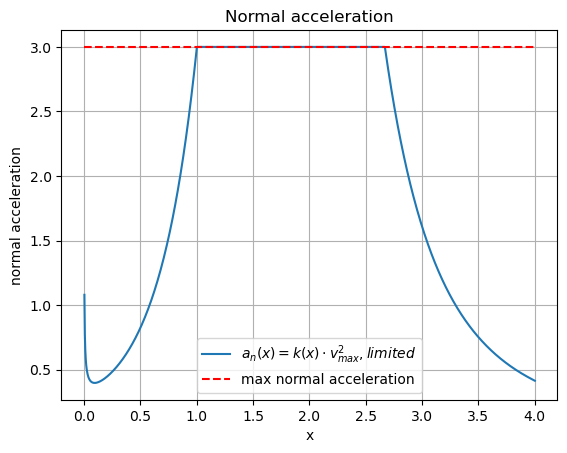

In [85]:
# set maximum available normal acceleration

accnmax = np.clip(curvature * VMAX**2, a_min=None, a_max=ANMAX)

plt.grid()
plt.plot(x, accnmax, label='$a_n(x) = k(x) \cdot v_{max}^2, limited$')
plt.hlines(
    ANMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max normal acceleration",
)
plt.xlabel("x")
plt.ylabel("normal acceleration")
plt.title("Normal acceleration")
plt.legend()

Now we have allowed $a_n$. Now as $a_n$ is related to $v$, at each point along $x$, we can compute $v$.

$v = \sqrt{\frac{a_n(x)}{k(x)}}$

/tmp/ipykernel_116350/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_116350/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


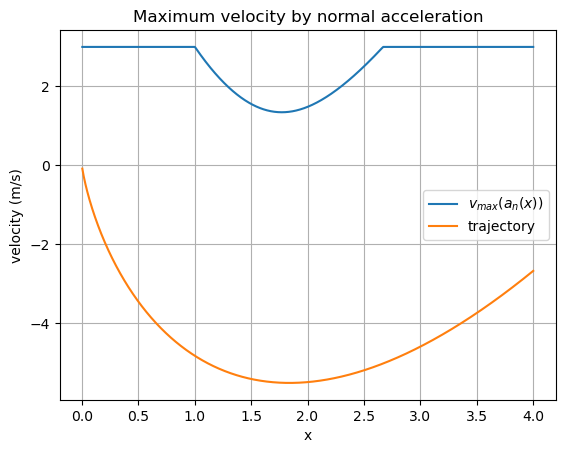

In [86]:
# compute maximum available velocity through the each point depending the normal acceleration

vmax_n = np.sqrt(accnmax / curvature)

plt.grid()
plt.plot(x, vmax_n, label="$v_{max} (a_n(x))$")
plt.plot(x, y(x), label="trajectory")

plt.xlabel("x")
plt.ylabel("velocity (m/s)")
plt.title("Maximum velocity by normal acceleration")

plt.legend()
plt.savefig("velocity_by_normal_acceleration.png")

From the graph, we see that we slow down in turning points. However, this is not the end. Now we are not moving with constant velcity. At some points we are slowing down (Changing the values of velcotiy). $a_t$ is responsible for the change of the value of velcotiy, and it is also limited. If you have a limitation on $a_t$, it means there's a maximum rate at which you can change your speed while driving. In our case it is $a_t = 2$.


**Tangential acceleration**

By differentiating the velocity by $x$, we can find the tangential acceleration $a_t(x)$ for each $x$.

/tmp/ipykernel_116350/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


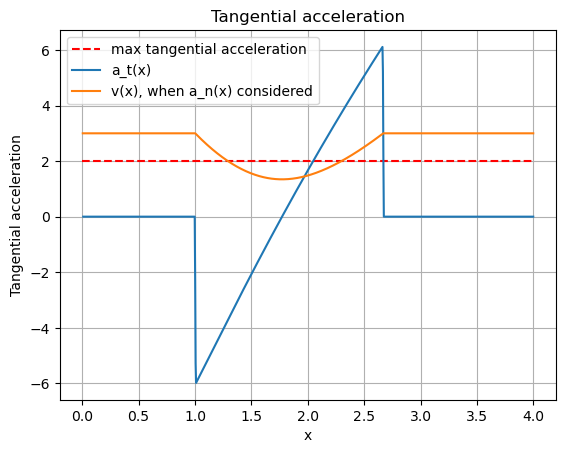

In [87]:
dv_dx = np.gradient(vmax_n, x)

acct = dv_dx * vmax_n / np.sqrt(1 + dy(x)**2)

plt.hlines(
    ATMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max tangential acceleration",
)
plt.plot(x, acct, label='a_t(x)')
plt.plot(x, vmax_n, label='v(x), when a_n(x) considered')
plt.xlabel("x")
plt.ylabel("Tangential acceleration")
plt.title("Tangential acceleration")
plt.legend()
plt.grid()

vmax_n_old = vmax_n.copy()

/tmp/ipykernel_116350/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


too fast change of velocity v1: 1.5385135835974304 v2: 1.5439795457220908 dv: 0.005454414429070062
too fast change of velocity v1: 1.5439679980265004 v2: 1.5495124999613687 dv: 0.005444337392620203
too fast change of velocity v1: 1.5494123354191207 v2: 1.555112075381301 dv: 0.005434231932761571
too fast change of velocity v1: 1.5548465673518823 v2: 1.5607779015073737 dv: 0.0054240993458992606
too fast change of velocity v1: 1.5602706666977815 v2: 1.5665096083850054 dv: 0.005413940913499238
too fast change of velocity v1: 1.5656846076112807 v2: 1.572306826638542 dv: 0.005403757901822378
too fast change of velocity v1: 1.5710883655131032 v2: 1.57816918752875 dv: 0.0053935515616659255
too fast change of velocity v1: 1.576481917074769 v2: 1.5840963230088243 dv: 0.005383323128132989
too fast change of velocity v1: 1.581865240202902 v2: 1.590087865778901 dv: 0.005373073820417673
too fast change of velocity v1: 1.5872383140233197 v2: 1.5961434493390825 dv: 0.005362804841605441
too fast change

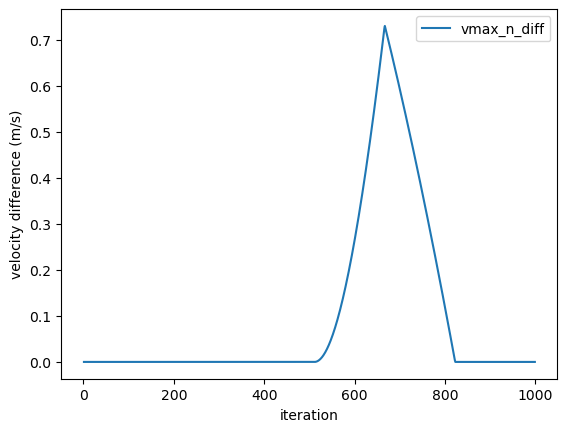

In [72]:


dx_sigmas = []

dvmax_n = np.gradient(vmax_n, x)

vmax = [vmax_n[0]]

for i0, i1 in zip(range(len(vmax_n) - 1), range(1, len(vmax_n))):
    dx_sigma = np.sqrt(1 + dy(x[i0]) ** 2)
    dx_vmax_n = dvmax_n[i0]
    dx = x[i1] - x[i0]

    max_dv = ATMAX * dx_sigma * dx / np.average([vmax_n[i0], vmax_n[i1]])
    if vmax[-1] + max_dv < vmax_n[i1]:
        print(
            f"too fast change of velocity v1: {vmax[-1]} v2: {vmax_n[i1]} dv: {max_dv}"
        )
        vmax.append(np.minimum(vmax[-1] + max_dv, vmax_n[i1]))
    else:
        vmax.append(vmax_n[i1])

    dx_sigmas.append(dx_sigma)

vmax = np.array(vmax)

pd.DataFrame(data={"vmax_n_diff": vmax_n - vmax}).plot()
plt.xlabel("iteration")
plt.ylabel("velocity difference (m/s)")

plt.savefig("veldiff.png")

$a_t(x)$ is out of the bounds. It should be in range of [-2, 2]. Let's approximate $v$ manually.

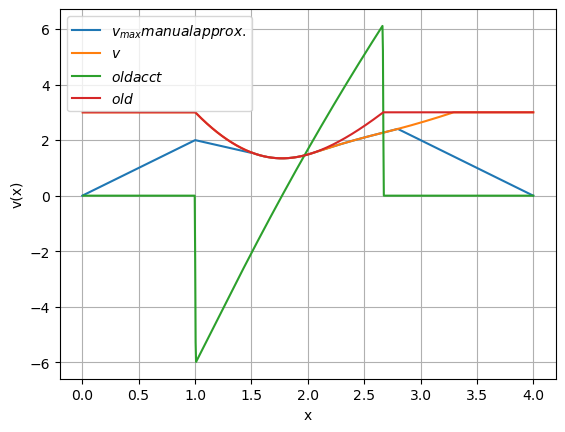

In [91]:
for j in range(1000):
    if x[j] < 1:
        vmax_n[j] = 2*x[j]
    elif x[j] < 1.5:
        vmax_n[j] = -0.92*(x[j]-1)+2
    elif x[j] < 2.80:
        vmax_n[j] = vmax[j]
    else:
        vmax_n[j] = -2*x[j] + 8
    

plt.grid()
plt.plot(x, vmax_n, label="$v_{max} manual approx.$")
plt.plot(x, vmax, label="$v_ $")
plt.plot(x, acct, label="$old acct$")
plt.plot(x, vmax_n_old, label="$old$")
plt.xlabel("x")
plt.ylabel("v(x)")
plt.legend()

In [89]:
for k in range(1000):
    if acct[k] > 2:
        print(f"k = {k}, x[k] = {x[k]}, vmax_n[k] = {vmax_n[k]}, vmax[k] = {vmax[k]}")

k = 512, x[k] = 2.05005005005005, vmax_n[k] = 1.5439679980265004, vmax[k] = 1.5439679980265004
k = 513, x[k] = 2.054054054054054, vmax_n[k] = 1.5494123354191207, vmax[k] = 1.5494123354191207
k = 514, x[k] = 2.058058058058058, vmax_n[k] = 1.5548465673518823, vmax[k] = 1.5548465673518823
k = 515, x[k] = 2.062062062062062, vmax_n[k] = 1.5602706666977815, vmax[k] = 1.5602706666977815
k = 516, x[k] = 2.066066066066066, vmax_n[k] = 1.5656846076112807, vmax[k] = 1.5656846076112807
k = 517, x[k] = 2.07007007007007, vmax_n[k] = 1.5710883655131032, vmax[k] = 1.5710883655131032
k = 518, x[k] = 2.074074074074074, vmax_n[k] = 1.576481917074769, vmax[k] = 1.576481917074769
k = 519, x[k] = 2.078078078078078, vmax_n[k] = 1.581865240202902, vmax[k] = 1.581865240202902
k = 520, x[k] = 2.0820820820820822, vmax_n[k] = 1.5872383140233197, vmax[k] = 1.5872383140233197
k = 521, x[k] = 2.086086086086086, vmax_n[k] = 1.5926011188649252, vmax[k] = 1.5926011188649252
k = 522, x[k] = 2.09009009009009, vmax_n[k] =

In [54]:
for k in range(650, 1000):
    # if vmax_n[k] == vmax[k]:
    #     print(f"k = {k}, x[k] = {x[k]}, vmax_n[k] = {vmax_n[k]}, vmax[k] = {vmax[k]}")
    print(f"k = {k}, x[k] = {x[k]}, vmax_n[k] = {vmax_n[k]}, vmax[k] = {vmax[k]}, {vmax_n[k] - vmax[k]}")

k = 650, x[k] = 2.6026026026026026, vmax_n[k] = 2.200589158081798, vmax[k] = 2.200589158081798, 0.0
k = 651, x[k] = 2.6066066066066065, vmax_n[k] = 2.2047117503614757, vmax[k] = 2.2047117503614757, 0.0
k = 652, x[k] = 2.6106106106106104, vmax_n[k] = 2.2088264473560346, vmax[k] = 2.2088264473560346, 0.0
k = 653, x[k] = 2.6146146146146148, vmax_n[k] = 2.2129332773065804, vmax[k] = 2.2129332773065804, 0.0
k = 654, x[k] = 2.6186186186186187, vmax_n[k] = 2.2170322683919728, vmax[k] = 2.2170322683919728, 0.0
k = 655, x[k] = 2.6226226226226226, vmax_n[k] = 2.2211234487272074, vmax[k] = 2.2211234487272074, 0.0
k = 656, x[k] = 2.6266266266266265, vmax_n[k] = 2.225206846361844, vmax[k] = 2.225206846361844, 0.0
k = 657, x[k] = 2.6306306306306304, vmax_n[k] = 2.2292824892784924, vmax[k] = 2.2292824892784924, 0.0
k = 658, x[k] = 2.6346346346346348, vmax_n[k] = 2.2333504053913438, vmax[k] = 2.2333504053913438, 0.0
k = 659, x[k] = 2.6386386386386387, vmax_n[k] = 2.237410622544756, vmax[k] = 2.2374106

/tmp/ipykernel_116350/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


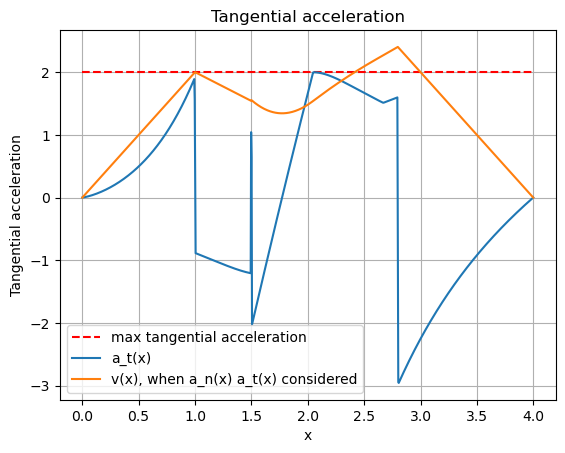

In [74]:
dv_dx = np.gradient(vmax_n, x)
dy_values = dy(x)

acct = dv_dx * vmax_n / np.<(1 + dy_values**2)

plt.hlines(
    ATMAX,
    XMIN,
    XMAX,
    colors="red",
    linestyles="dashed",
    label="max tangential acceleration",
)
plt.plot(x, acct, label='a_t(x)')
plt.plot(x, vmax_n, label='v(x), when a_n(x) a_t(x) considered')
plt.xlabel("x")
plt.ylabel("Tangential acceleration")
plt.title("Tangential acceleration")
plt.legend()
plt.grid()

/tmp/ipykernel_116350/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3
/tmp/ipykernel_116350/1548475892.py:2: RuntimeWarning: divide by zero encountered in log
  y = lambda x: 3*x*np.log(x/5)
/tmp/ipykernel_116350/1548475892.py:2: RuntimeWarning: invalid value encountered in multiply
  y = lambda x: 3*x*np.log(x/5)


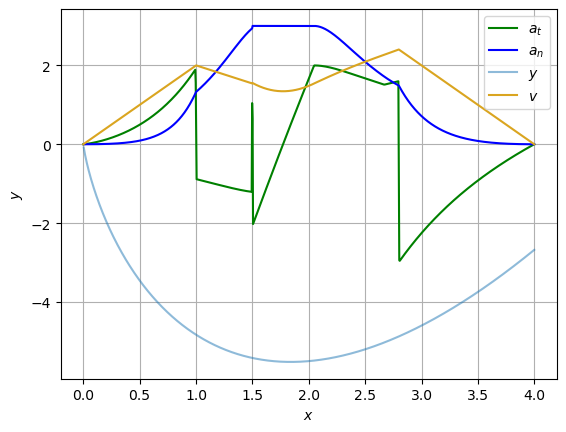

In [75]:
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
# ax1.set_ylim(-10, 10)

plt.plot(x, np.gradient(vmax_n, x)*vmax_n/np.sqrt(1+dy(x)**2), color='g', label=r'$a_t$')
plt.plot(x, np.power(vmax_n,2)*curvature, color='b', label=r'$a_n$')
plt.plot(x, y(x), alpha=0.5, label=r'$y$')
plt.plot(x, vmax_n, color='goldenrod', label=r'$v$')
plt.legend()

The final time $t$ is:

$t=\int^4_0\frac{\sigma^{\prime}_x}{v}$

$t=\int^4_0\frac{\sqrt{1+y^{\prime\ 2}}}{v}dx$

In [77]:
print(np.trapz(np.sqrt(1+np.power(dy(x)[1:-1],2))/vmax_n[1:-1], dx=dx))

37.140019294513834


/tmp/ipykernel_116350/1548475892.py:3: RuntimeWarning: divide by zero encountered in log
  dy = lambda x: 3*np.log(x) - 3 * np.log(5) + 3


I got $t = 1.2312687977834655$, but it seems to be incorrect

### Simulation

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import solve, diff, sin, cos, lambdify, sqrt
from sympy.abc import symbols
from IPython.display import HTML, display

In [60]:
num_frames = 120
t_start = 0
t_end = 4
t_values = np.linspace(t_start, t_end, num_frames)

O1_O = 60
alpha = np.radians(45)

# Set the needed variables for further solving using sympy
t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, R, O_M, O1_M1 = symbols('t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, R, O_M, O1_M1')


def multify(params, *args):
    lambdas = []
    for func in args:
        lambdas.append(lambdify([params], func))

    return lambdas

# Lambdifying functions
phi_of_t = 0.2 * (t**3) + t
func_phi_ = lambdify(t, phi_of_t)

# angular velocity
func_w_tr = 0.6 * (t ** 2) + 1
w_tr_ = lambdify(t, func_w_tr)


func_rel_vel_M = 10 * sqrt(2) * t + 5 * sqrt(2)
rel_vel_M_ = lambdify(t, func_rel_vel_M)

a_rel_M = 10 * sqrt(2)

func_acc_tang_M = 1.2 * t * R # = eps * R
acc_tang_M_ = multify((t, R), func_acc_tang_M)[0]

func_acc_norm_M = (R * (0.6 * (t ** 2) + 1))**2 / R # = V_tr^2/R
acc_norm_M_ = multify((t, R), func_acc_norm_M)[0]

func_vel_O = func_w_tr * O1_O

# Gives the length of the O_M
func_len_O_M = 5 * sqrt(2) * (t**2 + t)
len_O_M_ = lambdify(t, func_len_O_M)

# Gives the length of R
func_R = sqrt(O1_O**2 + O_M**2 - 2 * O1_O * O_M * cos(alpha))
R_ = lambdify(O_M, func_R)

# Finds coordinates of point O
func_x_O = O1_O*cos(phi)
func_y_O = O1_O*sin(phi)
x_O_, y_O_ = lambdify(phi, func_x_O), lambdify(phi, func_y_O)

# Finds coordinates of point O2
func_x_O2 = O1_O*cos(phi + np.radians(90))
func_y_O2 = O1_O*sin(phi + np.radians(90))
x_O2_, y_O2_ = lambdify(phi, func_x_O2), lambdify(phi, func_y_O2)

#corriolsi
f_a_corr_ = 10*np.sqrt(2)*(0.6*t**2 + 1) * (t + 1)
f_a_corr = lambdify(t, f_a_corr_)



In [61]:
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-80, 80)
ax.set_ylim(-80, 80)

line_O1_O, = ax.plot([], [], color='violet', lw = 2, label="O1_O")
line_O1_O2, = ax.plot([], [], color='indigo', lw = 2, label="O1_O2")
line_OO2, = ax.plot([], [], color='dodgerblue', lw = 2, label="O_O2")
line_R, = ax.plot([], [], color='royalblue', lw = 2, label="R")
line_V_REL, = ax.plot([], [], color='red', lw = 2, label="V_REL")

point_M, = ax.plot([], [], 'bo', markersize = 3)
point_O, = ax.plot([], [], color='violet', markersize = 3)
point_O2, = ax.plot([], [], color='indigo', markersize = 3)


vel_tr_M_values = []
vel_rel_M_values = []
acc_tang_M_values = []
acc_norm_M_values = []
acc_transport = []
acc_rel = []
acc = []

def update(frame):
    phi = func_phi_(t_values[frame])
    x_O, y_O = x_O_(phi), y_O_(phi)
    point_O.set_data(x_O, y_O)
    
    x_O2, y_O2 = x_O2_(phi), y_O2_(phi)
    point_O2.set_data(x_O2, y_O2)
    
    OM = len_O_M_(t_values[frame])
    R = R_(OM)    
    
    angle_alpha = np.arcsin(np.sin(alpha)*OM / R) + phi
    x_M = R * cos(angle_alpha)
    y_M = R * sin(angle_alpha)
    
    line_O1_O.set_data([0, x_O], [0, y_O])
    line_O1_O2.set_data([0, x_O2], [0, y_O2])
    line_OO2.set_data([x_O, x_O2], [y_O, y_O2])
    line_R.set_data([0, x_M], [0, y_M])
    line_V_REL.set_data([x_M, x_M - rel_vel_M_((t_values[frame]))*np.cos(alpha - phi)], [y_M, y_M + rel_vel_M_((t_values[frame]))*np.sin(alpha - phi)])
    
    point_M.set_data((x_M, y_M))
    
    # Update the values
    vel_tr_M_values.append(w_tr_((t_values[frame])) * R) # the formula is omega * R 
    vel_rel_M_values.append(rel_vel_M_((t_values[frame])))

    acc_tan = acc_tang_M_((t_values[frame], R))
    acc_norm = acc_norm_M_((t_values[frame], R))

    acc_tang_M_values.append(acc_tan)
    acc_norm_M_values.append(acc_norm)
    acc_transport.append(np.sqrt(acc_tan**2 + acc_norm**2))

    acc_rel.append(10 * sqrt(2))
    
    a_corr = f_a_corr((t_values[frame]))

    acc_x = -acc_tan*np.sin(angle_alpha) - acc_norm*np.cos(angle_alpha) - a_corr*np.cos(alpha + phi) - 14.1421*np.cos(alpha - phi)
    acc_y = acc_tan*np.cos(angle_alpha) - acc_norm*np.sin(angle_alpha) -  a_corr*np.sin(alpha + phi) + 14.1421*np.sin(alpha - phi)
    acc.append(np.sqrt(acc_x**2 + acc_y**2))

    
    return ...


plt.title('Rotational Translatory Motion')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc=(1.005, 0.7))
    
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=60)

plt.gca().set_aspect(aspect='equal', adjustable='box')    
plt.grid(True)
# ani.save("task2_anim.gif")
display(HTML(ani.to_jshtml()))
plt.close(fig)

/tmp/ipykernel_116350/1495498571.py:28: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O.set_data(x_O, y_O)
/tmp/ipykernel_116350/1495498571.py:31: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O2.set_data(x_O2, y_O2)
/tmp/ipykernel_116350/1495498571.py:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_M.set_data((x_M, y_M))
